In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df_reader = pd.read_json('data/quotebank/quotes-2020.json.bz2', lines=True, compression='bz2', chunksize =10000 )





In [3]:
%%time
climate_quotes = []
for chunk in df_reader: 
    df = chunk[chunk.quotation.str.contains('climate', case=False, na=False)]
    climate_quotes.append(df)

CPU times: user 4min 12s, sys: 4.49 s, total: 4min 17s
Wall time: 4min 17s


In [4]:
len(climate_quotes)

525

In [5]:
climate_df = pd.concat(climate_quotes)

In [6]:
climate_df.shape

(18345, 9)

In [7]:
climate_df.head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
111,2020-02-27-004325,And it's also in the context of decades of utt...,None,[],2020-02-27 15:17:36,1,"[[None, 0.8786], [Bernie Sanders, 0.1214]]",[http://www.eenews.net/stories/1062457547],E
1223,2020-01-29-062975,Many make the link today between their experie...,Peter Maurer,"[Q117796, Q42426597]",2020-01-29 09:04:36,5,"[[Peter Maurer, 0.8787], [None, 0.1213]]",[http://whbl.com/news/articles/2020/jan/29/hun...,E
1327,2020-02-21-045926,Now you hear a lot about climate action at the...,None,[],2020-02-21 08:58:25,1,"[[None, 0.9165], [Michael Bloomberg, 0.0835]]",[https://grist.org/politics/bloomberg-bombed-t...,E
1513,2020-01-17-068930,Single crusades in Australia will have absolut...,Barnaby Joyce,[Q4861362],2020-01-17 11:03:00,7,"[[Barnaby Joyce, 0.7182], [None, 0.2581], [Mal...",[http://watoday.com.au/politics/federal/can-sc...,E
1570,2020-02-13-081378,Super giants funnel billions into fossil fuels...,None,[],2020-02-13 13:00:00,1,"[[None, 0.9359], [Richard Murnane, 0.0641]]",[http://www.smh.com.au/national/nsw/pm-seems-t...,E
1755,2020-02-10-076321,the National Energy and Climate Plans are how ...,Kadri Simson,[Q13570003],2020-02-10 05:51:51,1,"[[Kadri Simson, 0.9269], [None, 0.0504], [Gret...",[https://www.politico.eu/newsletter/brussels-p...,E
1959,2020-01-06-069057,"This budget also allows us to earmark £ 500,00...",John Whitehead,"[Q55436000, Q58150131, Q6263827, Q6263833, Q62...",2020-01-06 11:49:00,1,"[[John Whitehead, 0.7971], [None, 0.2029]]",[https://www.buryfreepress.co.uk/news/draft-bu...,E
1968,2020-03-11-067463,This entry on its face represents a senior off...,None,[],2020-03-11 00:00:00,1,"[[None, 0.8256], [Peter Kilmartin, 0.1744]]",[http://legalnewsline.com/stories/527297906-th...,E
1994,2020-02-07-097324,this is so important when celebrities are will...,None,[],2020-02-07 23:33:38,4,"[[None, 0.4382], [Jane Fonda, 0.3081], [Joaqui...",[https://www.msn.com/en-us/movies/news/jane-fo...,E
2691,2020-03-10-005294,"As a state, we will pursue every option availa...",Kate Brown,"[Q16727692, Q6375399]",2020-03-10 20:47:28,2,"[[Kate Brown, 0.7275], [None, 0.2726]]",[http://www.courthousenews.com/oregon-governor...,E


In [8]:
speakers = climate_df.groupby('speaker')['quoteID'].count().sort_values(ascending=False)
speakers.head(20)

speaker
None                    5943
Bernie Sanders           176
Greta Thunberg           142
Scott Morrison           121
Larry Fink                92
Tom Steyer                68
Jane Fonda                66
Joaquin Phoenix           65
Pete Buttigieg            64
Joe Biden                 61
Antonio Guterres          60
Elizabeth Warren          54
Michael Mann              50
Malcolm Turnbull          49
Ursula von der Leyen      44
Boris Johnson             42
Jeff Bezos                39
Mark Carney               38
Adam Bandt                37
Anthony Albanese          32
Name: quoteID, dtype: int64

In [9]:
text = "".join(quote for quote in climate_df.quotation)
print ("There are {} words in the combination of all quotes.".format(len(text)))

There are 3648607 words in the combination of all quotes.


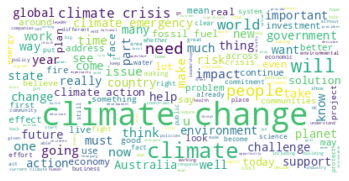

In [10]:
wordcloud = WordCloud( background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## You can directly load climate df from the data folder

In [12]:
# climate_df.to_pickle('data/climate_df.pkl')

In [3]:
# you can now easily read climate_df using:
climate_df_copy = pd.read_pickle('data/climate_df.pkl')

In [14]:
climate_df_copy.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
111,2020-02-27-004325,And it's also in the context of decades of utt...,None,[],2020-02-27 15:17:36,1,"[[None, 0.8786], [Bernie Sanders, 0.1214]]",[http://www.eenews.net/stories/1062457547],E
1223,2020-01-29-062975,Many make the link today between their experie...,Peter Maurer,"[Q117796, Q42426597]",2020-01-29 09:04:36,5,"[[Peter Maurer, 0.8787], [None, 0.1213]]",[http://whbl.com/news/articles/2020/jan/29/hun...,E
1327,2020-02-21-045926,Now you hear a lot about climate action at the...,None,[],2020-02-21 08:58:25,1,"[[None, 0.9165], [Michael Bloomberg, 0.0835]]",[https://grist.org/politics/bloomberg-bombed-t...,E
1513,2020-01-17-068930,Single crusades in Australia will have absolut...,Barnaby Joyce,[Q4861362],2020-01-17 11:03:00,7,"[[Barnaby Joyce, 0.7182], [None, 0.2581], [Mal...",[http://watoday.com.au/politics/federal/can-sc...,E
1570,2020-02-13-081378,Super giants funnel billions into fossil fuels...,None,[],2020-02-13 13:00:00,1,"[[None, 0.9359], [Richard Murnane, 0.0641]]",[http://www.smh.com.au/national/nsw/pm-seems-t...,E
